# Plot of principal null geodesics in Kerr spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](https://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

The computations make use of tools developed through the [SageManifolds project](https://sagemanifolds.obspm.fr).

In [1]:
version()

'SageMath version 9.3.rc2, Release Date: 2021-04-06'

First we set up the notebook to display mathematical objects using LaTeX rendering:

In [2]:
%display latex

## Spacetime manifold

We declare the Kerr spacetime as a 4-dimensional Lorentzian manifold $M$:

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
print(M)

4-dimensional Lorentzian manifold M


and introduce the (3+1 version of) **Kerr coordinates** $(\tilde{t},r,\theta,\tilde{\varphi})$ as a chart `KC` on $M$, via the method `chart()`. The argument of the latter is a string (delimited by `r"..."` because of the backslash symbols) expressing the coordinates names, their ranges (the default is $(-\infty,+\infty)$) and their LaTeX symbols:

In [4]:
KC.<tt,r,th,tph> = M.chart(r"tt:\tilde{t} r th:(0,pi):\theta tph:(0,2*pi):periodic:\tilde{\varphi}") 
print(KC); KC

Chart (M, (tt, r, th, tph))


Chart (M, (tt, r, th, tph))

In [5]:
a = 0.9
m = 1 
rp = m + sqrt(m^2-a^2)
rm = m - sqrt(m^2-a^2)
(rp,rm)

(1.43588989435407, 0.564110105645933)

## Plot of the principal null geodesics in the $(\tilde{t}, r)$ plane

In [6]:
tt_in(r,v) = v - r
tt_in

(r, v) |--> -r + v

In [7]:
tt_out(r,u) = u + r + 2*m/sqrt(m^2 - a^2)*(rp*ln(abs((r - rp)/(2*m))) - rm*ln(abs((r - rm)/(2*m))))
tt_out

(r, u) |--> r + u - 2.58831467741124*log(abs(1/2*r - 0.282055052822966)) + 6.58831467741124*log(abs(1/2*r - 0.717944947177034))

In [8]:
rmin = -8; rmax = 8
graph = Graphics()
for u0 in range(-20, 20, 2):
    graph += plot(tt_out(r, u0), (r, rmin, rmax), color='green', ticks=2,
                  axes_labels=[r"$r/m$", r"$\tilde{t}/m$"])

In [9]:
for v0 in range(-20, 20, 2):
    graph += plot(tt_in(r, v0), (r, rmin, rmax), color='green', linestyle='--')

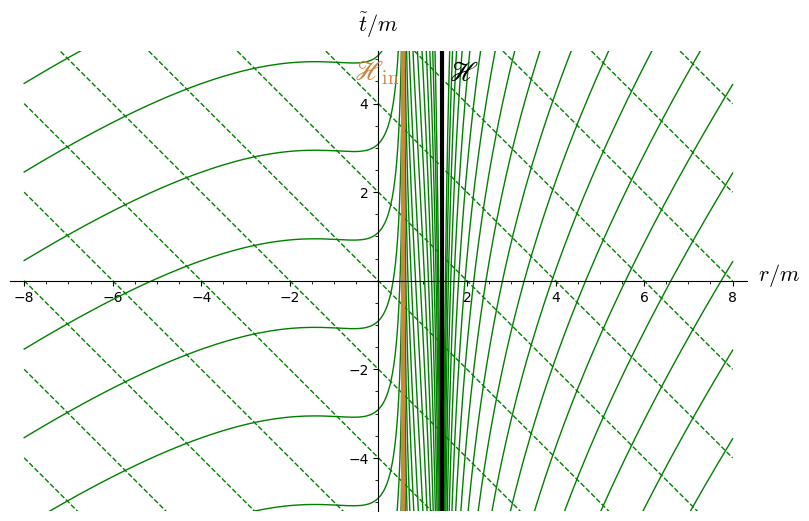

In [10]:
H = line(((rp, -8), (rp, 8)), color='black', thickness=3) + \
    text(r'$\mathscr{H}$', (rp+0.5, 4.7), color='black', fontsize=20)
Hin = line(((rm, -8), (rm, 8)), color='peru', thickness=3) + \
      text(r'$\mathscr{H}_{\rm in}$', (rm-0.6, 4.7), color='peru', fontsize=20)
graph += H + Hin
show(graph, aspect_ratio=1, ymin=-5, ymax=5, figsize=8)

### Adding the vectors $k$ and $\ell$ to the plot

In [11]:
k = M.vector_field(1, -1, 0, 0, name='k')
k.display()

k = d/dtt - d/dr

In [12]:
el = M.vector_field(1/2 + m*r/(r^2 + a^2),
                    1/2 - m*r/(r^2 + a^2),
                    0,
                    a/(r^2 + a^2),
                    name='el', latex_name=r'\ell')
el.display()

el = (r/(r^2 + 0.810000000000000) + 1/2) d/dtt + (-r/(r^2 + 0.810000000000000) + 1/2) d/dr + 0.900000000000000/(r^2 + 0.810000000000000) d/dtph

We add the vectors $k$ and $\ell$ at the intersection of the $v=6m$ ingoing geodesic with the $u=-6m$ outgoing one:

In [13]:
u0, v0 = -6, 6
r0 = RDF(find_root(tt_in(r, v0) == tt_out(r, u0), 2, 6))
tt0 = tt_in(r0, v0)
tt0, r0

(0.9214504459373298, 5.07854955406267)

In [14]:
p0 = M((tt0, r0, pi/2, 0), name='p_0')
k0 = k.at(p0)
print(k0)

Tangent vector k at Point p_0 on the 4-dimensional Lorentzian manifold M


In [15]:
el0 = el.at(p0)
print(el0)

Tangent vector el at Point p_0 on the 4-dimensional Lorentzian manifold M


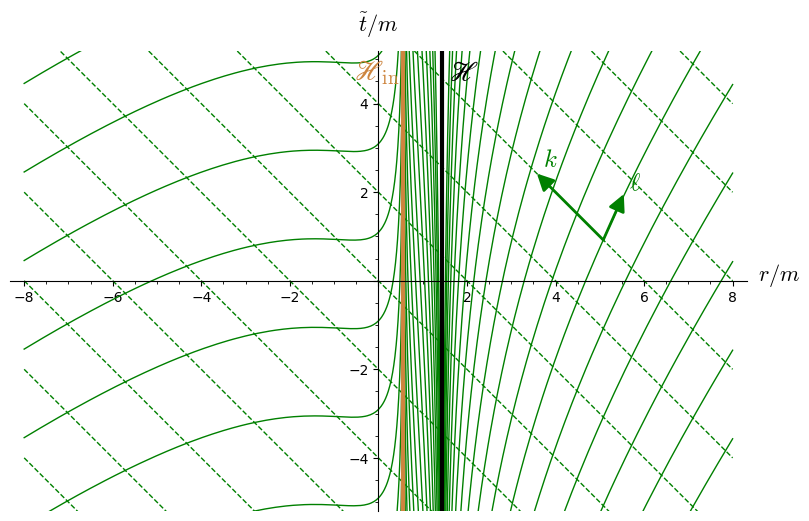

In [16]:
graph +=  k0.plot(chart=KC, ambient_coords=(r, tt), color='green', 
                  scale=1.5, fontsize=18, label_offset=0.3)  \
          + el0.plot(chart=KC, ambient_coords=(r, tt), color='green', 
                     parameters={m: 1}, scale=1.5, fontsize=18,
                     label_offset=0.25)
graph.save("ker_princ_null_geod.pdf", aspect_ratio=1, ymin=-5, ymax=5,
           figsize=8)
show(graph, aspect_ratio=1, ymin=-5, ymax=5, figsize=8)